This jupyter notebook licensed with CC-BY-NC. See https://gitlab.com/awsteiner/ugastro_ipynb/blob/master/LICENSE.md for details.

Initializations:

In [1]:
import numpy as np
import matplotlib.pyplot as plot
import random
import math

First, we'll work in different units. AU for length, 
Mearth for mass, and years for time. Normally G is 6.674e-11 in 
SI units, 
$$ 6.674 \times 10^{-11}~\mathrm{m}^3/\mathrm{kg}/\mathrm{s}^2 $$ 

<font color="red">Task 1: Compute G in these new units and use the next line
to set the variable G</font>

In [2]:
G=1
print(G)

1


This is the function which does a simple
gravitational N-body simulation. You don't need to understand
all of the details of the function, but the arguments are
important. The function 
requires five arguments. The first is G in our new unit
system. The second is an array of initial x coordinates.
The third is an array of initial y coordinates. The fourth
is an array of initial x velocities. The fifth is an 
array of initial y velocities. This function uses the Verlet 
algorithm (https://en.wikipedia.org/wiki/Verlet_integration), 
and forces all the z-velocities and z-coordinates to
be zero. 
The number 'N' refers to the number of objects. The label 
'mass' is an optional array of masses. If the mass array is
not specified, it presumes the first mass is the solar mass
and all other mass are the Earth's mass (1 in these units). 
The 'Nstep' number refers to the number of time steps
(and must always be less than 1000),
and 'dt' refers to the length of the time step (in years). 

In [3]:
def verlet_xy(G,x_init,y_init,vx_init,vy_init,Nstep=100,mass=0,N=2,dt=0.01,verbose=0):
    
    if verbose>0:
        print('N,Nstep',N,Nstep)
    
    x=np.zeros((N,3,Nstep+1))
    a=np.zeros((N,3))
    m=np.zeros((N))
    t=0

    if Nstep>1000:
        raise Exception('Too many steps.')
    
    # Initialize remaining objects
    for io in range(0,N):
        if type(mass)==type(int(0)) and mass==0:
            if io==0:
                m[0]=332946.0
            else:
                m[io]=1.0
        else:
            m[io]=mass[io]

        x[io][0][0]=x_init[io]
        x[io][1][0]=y_init[io]
        x[io][2][0]=0
        x[io][0][1]=x_init[io]+vx_init[io]*dt
        x[io][1][1]=y_init[io]+vy_init[io]*dt
        x[io][2][1]=0
      
    if verbose>0:
        print('x:',0,x[:,:,0])
        print('x:',1,x[:,:,1])
        
    # Loop over timesteps
    for it in range(1,Nstep):
        
        # Compute acceleration on object io from object ip
        for io in range(0,N):
            fx=0.0
            fy=0.0
            fz=0.0
            for ip in range(0,N):
                if io!=ip:
                    dx=x[io][0][it]-x[ip][0][it]
                    dy=x[io][1][it]-x[ip][1][it]
                    dz=x[io][2][it]-x[ip][2][it]
                    dd=math.sqrt(dx*dx+dy*dy+dz*dz)
                    # Component of gravitational force in x,
                    # y, and z directions
                    fx=fx-G*m[io]*m[ip]*dx/dd/dd/dd
                    fy=fy-G*m[io]*m[ip]*dy/dd/dd/dd
                    fz=fz-G*m[io]*m[ip]*dz/dd/dd/dd
                    if verbose>1:
                        print('f:',fx,fy,fz)
            a[io][0]=fx/m[io]
            a[io][1]=fy/m[io]
            a[io][2]=fz/m[io]
            if verbose>1:
                print('a:',io,a[io][0],a[io][1],a[io][2])
            
        # Now implement Verlet method
        for io in range(0,N):
            for ic in range(0,3):
                x[io][ic][it+1]=(2.0*x[io][ic][it]-x[io][ic][it-1]+
                    dt*dt*a[io][ic])
                
        if verbose>0:
            print('x:',it+1,x[:,:,it+1])
            
    return x


<font color="red">Task 2: The first simulation is just the sun and earth. The initial positions have already been specified. The coordinate
    system is set so that the Sun is at the origin and the Earth is at x=0 and y=1. Set v_init to the correct initial y velocity for the Earth (in AU/year),
presuming a circular orbit. If you get the correct velocity, you
should just see a circle.</font> 

In [4]:
v_init=0
x=verlet_xy(G,[0,1],[0,0],[0,0],[0,v_init])
fig=plot.figure(figsize=(5,5))
plot.plot(x[0][0][:],x[0][1][:])
plot.plot(x[1][0][:],x[1][1][:])
plot.xlim([-1.2,1.2])
plot.ylim([-1.2,1.2])
plot.show()

<font color="red">Task 3: Explain how you got the correct velocity above: (double click the cell below to edit)</font>

<font color="red">Task 4: The second simulation is also the sun and earth. Now, modify the initial velocities (which are set to zero here) to get an elliptical orbit. You may need to increase Nstep to get the full orbit (but keep Nstep less than 1000). You may also need to increase the plot limits in the 'xlim' and 'ylim' function calls to see the whole orbit.</font> 

In [12]:
x=verlet_xy(G,[0,1],[0,0],[0,0],[0,0],Nstep=300)
fig=plot.figure(figsize=(5,5))
plot.plot(x[0][0][:],x[0][1][:])
plot.plot(x[1][0][:],x[1][1][:])
plot.xlim([-2,2])
plot.ylim([-2,2])
plot.show()

<font color="red">Task 5: This is now a three object system. 
Now notice that the arrays have three entries instead of two
and we add the 'N=3' argument below. Create a system with 
    Earth and one additional planet, ensuring both have 
    circular orbits. You'll need to change the initial x
    vector and the initial y velocities. You may also need
    to change Nstep and the plot x and y limits.</font>

In [15]:
x=verlet_xy(G,[0,2,1],[0,0,0],
            [0,0,0],[0,0,0],Nstep=300,N=3)
fig=plot.figure(figsize=(5,5))
plot.plot(x[0][0][:],x[0][1][:])
plot.plot(x[1][0][:],x[1][1][:])
plot.plot(x[2][0][:],x[2][1][:])
plot.xlim([-7,7])
plot.ylim([-7,7])
plot.show()

Now we're going to see what happens with a series of 
planets. We define a new variable 'Np' as the number
of planets. The lines

```
x_init=np.random.rand((Np))*2-1
y_init=np.random.rand((Np))*2-1
```

initialize the x and y values to random numbers between 
-1 and 1. The line

```
v_init=np.zeros(Np)
```

gives the initial velocities as zero, and 

```
m_init=np.full((Np),20)
```

ensures that all planets are have a mass equal to 20
earth masses. 


In [7]:
Np=20
x_init=np.random.rand((Np))*2-1
y_init=np.random.rand((Np))*2-1
v_init=np.zeros(Np)
m_init=np.full((Np),20)
print(x_init)
print(y_init)
print(v_init)
print(m_init)

[-0.84601603  0.61965848  0.40408765 -0.06439616  0.663868    0.78400102
  0.31389152 -0.77941472 -0.86285153 -0.32498965 -0.42991923 -0.30261799
 -0.93035699  0.7406314  -0.46913229  0.27829218 -0.2037121   0.88817415
 -0.53137775  0.47276677]
[ 0.48640039  0.71444825  0.31121026  0.01599101  0.06144339 -0.93889023
  0.1964164   0.66117021  0.09256056  0.58034536  0.32281965 -0.18904906
  0.4015038   0.69816298 -0.26723705 -0.10940178 -0.24953268 -0.62432883
 -0.70534784  0.74548968]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20]


This code shows the simulation of the evolution of our 20 Earth mass planets. 

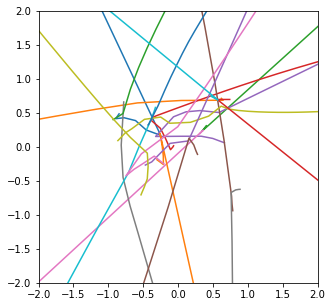

In [8]:
x=verlet_xy(G,x_init,y_init,v_init,v_init,N=Np,mass=m_init,Nstep=1000)
fig=plot.figure(figsize=(5,5))
for i in range(0,Np):
    plot.plot(x[i][0][:],x[i][1][:])
plot.xlim([-2,2])
plot.ylim([-2,2])
plot.show()

<font color="red">Task 6: Use the code below and modify the x and y limits to zoom in on one of the planet-planet interactions. How close do the planets get? Put your answer on the blank input below</font>

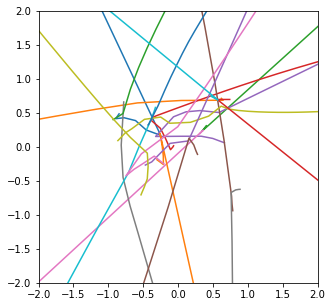

In [9]:
fig=plot.figure(figsize=(5,5))
for i in range(0,Np):
    plot.plot(x[i][0][:],x[i][1][:])
plot.xlim([-2,2])
plot.ylim([-2,2])
plot.show()

<font color="red">Task 7: Now copy the planet simulation code from above and use it to perform a new simulation with random velocities. Make the random velocities large enough that the new simulation appears different. Insert a blank Markdown block below and explain how the simulation is different and why?</font>

<font color="red">Task 8: The code above contains three lines of the form

```
fx=fx-G*m[io]*m[ip]*dx/dd/dd/dd
```

which specify the gravitational force. Notice that the distance
between the planets is dd, but there is an additional factor of
dx/dd above which gets the geometry right to get the 
'x component' of the Force, so this code correctly expresses
Newton's law of gravitation as an inverse square law. Create a new
Verlet function below (just copy, paste, and rename it) which has
a 1/r^3 Force rather than a 1/r^2 Force. Now, redo the 20 planets
of 20 Earth masses simulation with the new Verlet function. How are the results different?
</font>